In [155]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [156]:
%matplotlib inline
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from evalys import visu
from evalys.jobset import JobSet

In [157]:
input_location = 'KTH-1000-gauss'

In [158]:
schedule_files = []
jobs_files = []
for file in os.listdir('../output/' + input_location):
    if file.endswith('_schedule.csv'):
        schedule_files.append(file)
    elif file.endswith('_jobs.csv'):
        jobs_files.append(file)

schedule_files = [os.path.join('../output', input_location, str(file)) for file in sorted(schedule_files)]
jobs_files = [os.path.join('../output', input_location, str(file)) for file in sorted(jobs_files)]
print(schedule_files)
print(jobs_files)

['../output/KTH-1000-gauss/backfill-1_schedule.csv', '../output/KTH-1000-gauss/backfill-2_schedule.csv', '../output/KTH-1000-gauss/backfill-3_schedule.csv', '../output/KTH-1000-gauss/backfill-4_schedule.csv', '../output/KTH-1000-gauss/backfill-5_schedule.csv', '../output/KTH-1000-gauss/backfill-6_schedule.csv', '../output/KTH-1000-gauss/backfill-7_schedule.csv', '../output/KTH-1000-gauss/backfill-8_schedule.csv', '../output/KTH-1000-gauss/fcfs_schedule.csv']
['../output/KTH-1000-gauss/backfill-1_jobs.csv', '../output/KTH-1000-gauss/backfill-2_jobs.csv', '../output/KTH-1000-gauss/backfill-3_jobs.csv', '../output/KTH-1000-gauss/backfill-4_jobs.csv', '../output/KTH-1000-gauss/backfill-5_jobs.csv', '../output/KTH-1000-gauss/backfill-6_jobs.csv', '../output/KTH-1000-gauss/backfill-7_jobs.csv', '../output/KTH-1000-gauss/backfill-8_jobs.csv', '../output/KTH-1000-gauss/fcfs_jobs.csv']


In [159]:
metrics = pd.DataFrame()
for file in schedule_files:
    name = os.path.basename(file).split('_')[0]
    print(name)
    df = pd.read_csv(file)
    df['schedule'] = name
    df = df.set_index('schedule')
    metrics = metrics.append(df)

backfill-1
backfill-2
backfill-3
backfill-4
backfill-5
backfill-6
backfill-7
backfill-8
fcfs


In [160]:
metrics.T

schedule,backfill-1,backfill-2,backfill-3,backfill-4,backfill-5,backfill-6,backfill-7,backfill-8,fcfs
batsim_version,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0,3.1.0
consumed_joules,0,0,0,0,0,0,0,0,0
makespan,1.08795e+06,1.02711e+06,1.14278e+06,1.02281e+06,1.16851e+06,1.11031e+06,1.02126e+06,1.01778e+06,1.02412e+06
max_slowdown,64146,66691,102917,65451.7,110104,97879.5,71326.1,71326.1,82464.7
max_turnaround_time,429159,456534,524534,369540,539140,512248,376423,373267,387194
max_waiting_time,334464,269191,337153,216915,362610,314896,210497,207015,213350
mean_slowdown,2264.81,1978.92,3148.86,1674.18,4232.87,3521.02,1694.16,1707.4,3607.51
mean_turnaround_time,68411.1,55883.7,95493.6,68656.5,128457,109740,71573.4,71245.5,104386
mean_waiting_time,64117.8,51590.3,91201.8,64363,124164,105448,67280.2,66951.2,100094
nb_computing_machines,109,109,109,109,109,109,109,109,109


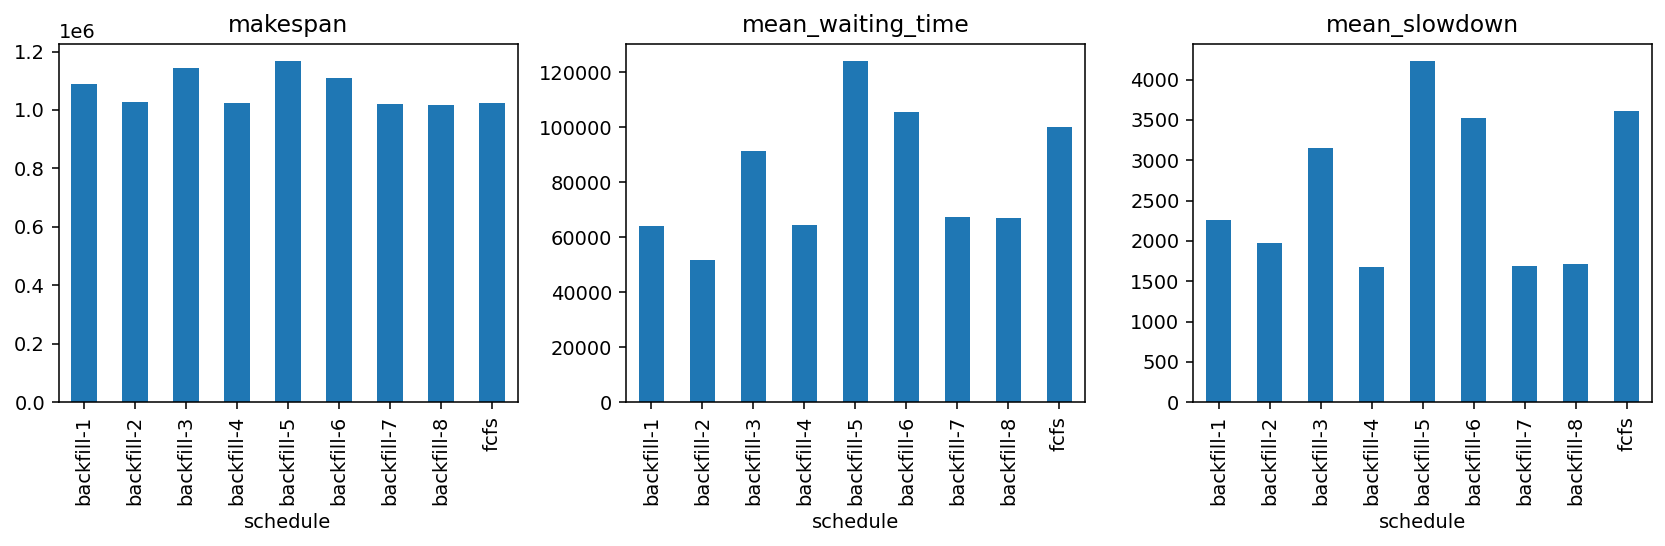

In [176]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), dpi=140)
metrics['makespan'].plot.bar(title='makespan', ax=axes[0])
metrics['mean_waiting_time'].plot.bar(title='mean_waiting_time', ax=axes[1])
metrics['mean_slowdown'].plot.bar(title='mean_slowdown', ax=axes[2])
fig.tight_layout()

In [162]:
jobsets = {}
for file in jobs_files:
    name = os.path.basename(file).split('_')[0]
    print(name)
    jobsets[name] = JobSet.from_csv(file)

backfill-1
backfill-2
backfill-3
backfill-4
backfill-5
backfill-6
backfill-7
backfill-8
fcfs


In [ ]:
diff_schedules = ['fcfs', 'backfill-1']

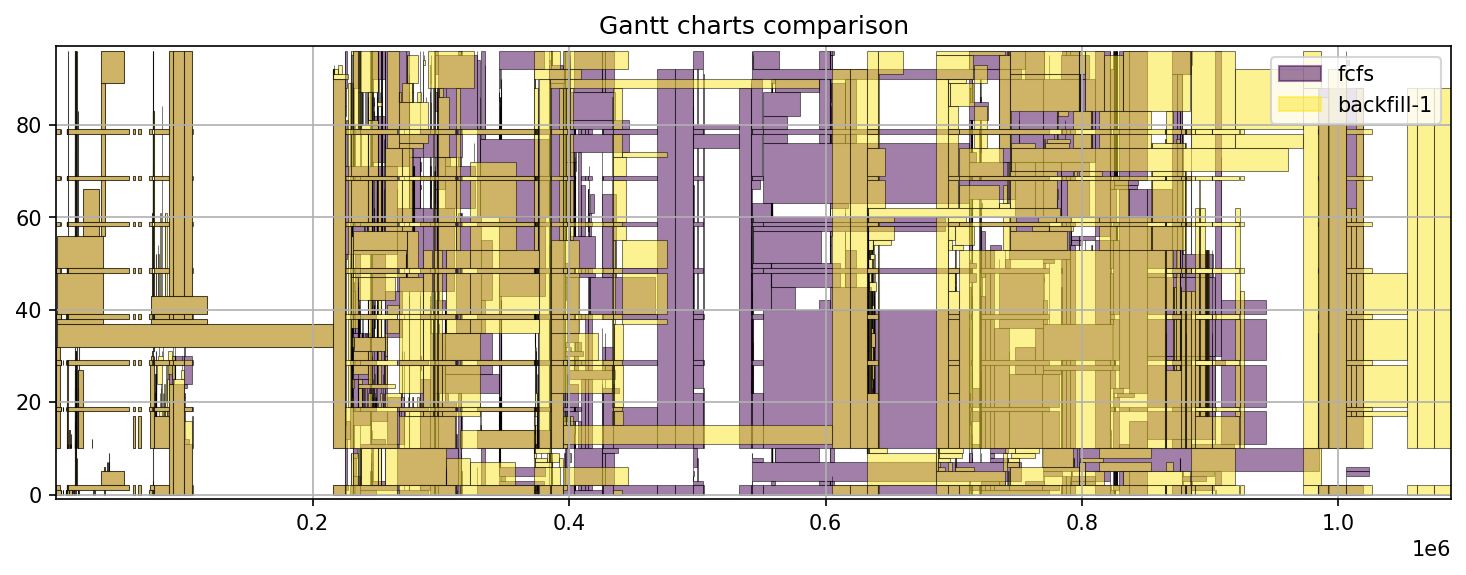

In [172]:
diff_jobsets = {schedule: jobsets[schedule] for schedule in diff_schedules}
matplotlib.rcParams['figure.figsize'] = 12,4
matplotlib.rcParams['figure.dpi']= 150
visu.gantt.plot_diff_gantt(diff_jobsets)

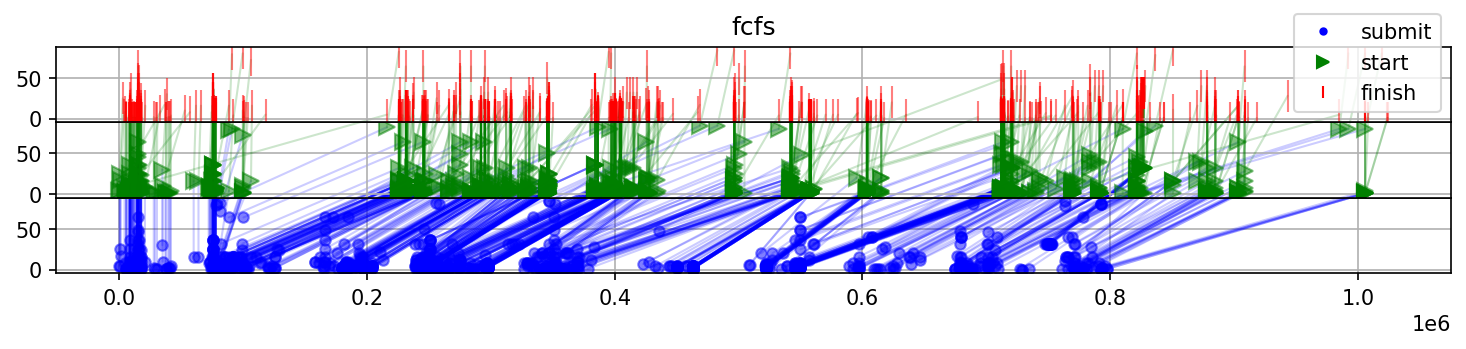

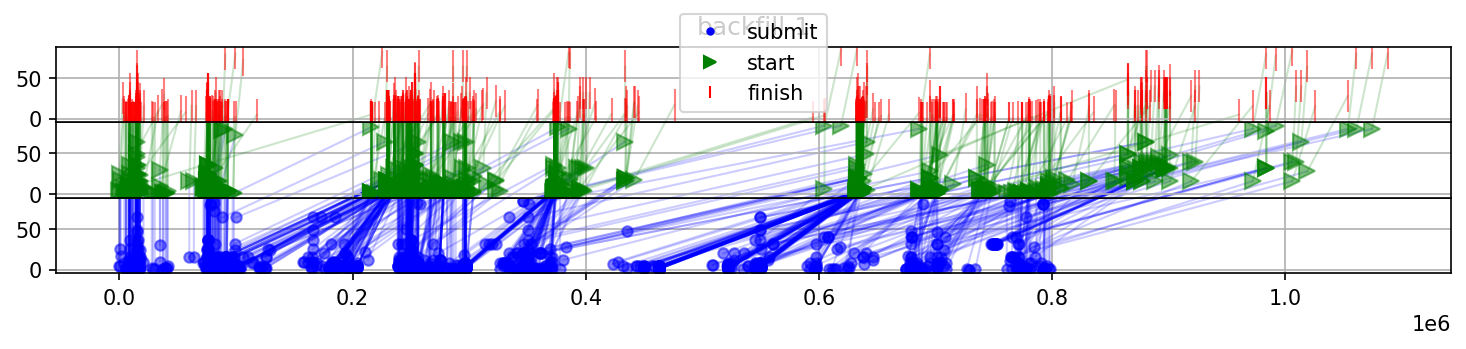

In [211]:
matplotlib.rcParams['figure.figsize'] = 12, 2
matplotlib.rcParams['figure.dpi']= 150
visu.lifecycle.plot_lifecycle(jobsets[diff_schedules[0]], title=diff_schedules[0])
visu.lifecycle.plot_lifecycle(jobsets[diff_schedules[1]], title=diff_schedules[1])